<a href="https://colab.research.google.com/github/france-lima/Analise-e-Pre-Processamento-de-Dados-de-Credito/blob/main/MVP_Analise_de_Dados_e_Boas_Praticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP 1: Análise Exploratória de Dados com Python**
# Autor: France Nunes de Lima

## **I. Definição do problema**
Objetivo: entender e descrever claramente o problema que está sendo resolvido.

* **Qual é a descrição do problema?** Em 2022, a inadimplência no Brasil alcançou mais uma vêz patamares inéditos, um provável reflexo da pandemia e do período de inflação alta e das elevadas taxas de juros praticadas. 
Com isso, nosso problema é o de estabelecer um perfil básico da inadiplência no período de 2022, consideranto, principalmente, os ativos classificados como problemáticos segundo os dados de crédito do Banco Central.

Os ativos são considerados **ativos problemáticos** quando é constatado pelo
menos um dos seguintes eventos:

I - operações de crédito em atraso há mais de 90 (noventa) dias;

II - a existência de indicativos de que a obrigação não será integralmente honrada sem que seja necessário recurso a garantias ou a colaterais (Para o BCB estes indicativos ocorrem quando a operação é objeto de reestruturação e a instituição financeira reconhece contabilmente deterioração significativa da
qualidade do crédito do tomador, classificando-o entre os níveis de risco E e H).

* **Este é um problema de aprendizado supervisionado ou não supervisionado?** Não. Nessa tarefa operamos técnicas menos robustas, como estatística descritiva e visualização de dados. Entretanto, a escolha dos dados se deu devido à sua adequação para o futuro desenvolvimento de um modelo preditivo do risco de eventual inadimplência. 
* **Que premissas ou hipóteses você tem sobre o problema?**
Partindo da particularidade do crédito imobiliário e de seu destaque em crises recentes, nossa hipotese principal a ser testada é a de que há uma ocorrência maior dos ativos considerados problemáticos entre indivíduos pertencentes a camadas economicamente mais pobres e, sobretudo, relacionada ao crédito habitacional. 
* **Que restrições ou condições foram impostas para selecionar os dados?** Os dados são apenas para o ano de 2022 e a análise se concentra no crédito a Pessoas Físicas.

### **Sobre os dados analisados**

Este notebook analisa os dados mensais do ano de 2022 do Sistema de Informações de Créditos do Banco Central do Brasil. Os arquivos .csv podem ser encontrados [aqui](https://dadosabertos.bcb.gov.br/dataset/scr_data).

A série histórica é baseada no
documento 3040 (SCR), com informações detalhadas de todas as operações de crédito cursadas no país de valor superior a 1.000 reais até a data-base de maio/16 e de valor superior a 200 reais a partir da data-base junho/16.

São disponibilizadas a Carteira Ativa e a Inadimplência agregadas com possibilidade de detalhamento por tipo de cliente (PF/PJ), modalidade de crédito, unidade da federação, Classificação Nacional de Atividades Econômicas – CNAE (PJ), natureza da ocupação (PF), porte/rendimento dos clientes, origem de recursos e indexador das operações.

### **Atributos do dataset**
Destacamos abaixo alguns atributos presentes no dataset. 
A documentação completa pode ser encontrada [aqui](https://www.bcb.gov.br/content/estabilidadefinanceira/scr/scr.data/scr_data_metodologia.pdf).

 **tcb** - Tipo de Consolidado Bancário (Bancário, Não Bancário, Cooperativas)

**sr** - Segmento Resolução 4553/2017 (S1, S2, S3, S4, S5)

**cliente** - Pessoas físicas (PF) ou jurídicas (PJ)

**ocupacao** - Naturezas de ocupação referem-se às pessoas físicas.

**cnae_secao** - Classe do Código Nacional de Atividades Econômicos - CNAE (PJ) 

**cnae_subclasse** - Subclasse do Código Nacional de Atividades Econômicos - CNAE (PJ) 

**porte** - agrupado em:
* PF - Sem rendimento
* PF - Até 1 salário-mínimo
* PF - Mais de 1 a 2 salários-mínimos
* PF - Mais de 2 a 3 salários-mínimos
* PF - Mais de 3 a 5 salários-mínimos
* PF - Mais de 5 a 10 salários-mínimos
* PF - Mais de 10 a 20 salários-mínimos
* PF - Acima de 20 salários-mínimos
* PF - Indisponível
* PJ - Micro
* PJ - Pequeno
* PJ - Médio
* PJ – Grande
* PJ - Indisponível

**modalidade** - apresentação agregada das submodalidades presentes no [Anexo 3](https://www.bcb.gov.br/estabilidadefinanceira/scrdoc3040):

* PF - Cartão de crédito
* PF - Empréstimo com consignação em folha
* PF - Empréstimo sem consignação em folha
* PF - Habitacional
* PF - Outros créditos
* PF - Rural e agroindustrial
* PF - Veículos
* PJ - Capital de giro rotativo
* PJ - Financiamento de infraestrutura/desenvolvimento/projeto e outros créditos
* PJ - Investimento
* PJ - Operações com recebíveis
* PJ - Outros créditos
* PJ - Rural e agroindustrial
* PJ - Capital de giro
* PJ - Comércio exterior
* PJ - Habitacional

**origem** - sem ou com destinação específica

**numero_de_operacoes** - o número de operações de crédito para uma dada série. Casos em que o número de operações seja inferior ou igual a 15, a informação divulgada será “<= 15”.

**carteira_ativa** - Carteira Total, somatório dos valores a vencer

**carteira_inadimplida_arrastada** - Somatório das operações de crédito a vencer e vencidos que possuam alguma parcela vencida há mais de
90 dias.

**ativo_problematico** - Somatório dos créditos das operações de crédito classificadas com risco entre E e H, operações reestruturadas e das
operações consideradas na carteira inadimplida arrastada (ver conceitos no item 2.d).

## **II. Análise dos Dados**


### 1. Instalação e Importação das bibliotecas para a Análise Exploratória
Abaixo as bibliotecas necessárias para esta etapa.




In [1]:
# Instalando biblioteca opendatasets.
!pip install opendatasets 

# Instalando a biblioteca gdown.
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importando biblioteca opendatasets.
import opendatasets as od

# Importando biblioteca pandas.
import pandas as pd

# Importando biblioteca os. 
import os

# Importando biblioteca numpy.
import numpy as np

# Importando biblioteca missingno.
import missingno as ms

# Importando a classe ZipFile da biblioteca zipfile.
from zipfile import ZipFile 

# Importando biblioteca gdown.
import gdown

# Importando a biblioteca seaborn.
import seaborn as sns 

# Importando a biblioteca pyplot da biblioteca matplotlib.
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


### 2. Importação dos dados e carregamento em um pandas data frame




In [3]:
# Baixando arquivo zip.
url = 'https://drive.google.com/u/0/uc?id=1Nm0XP39pbL5zqduXLUcssUIHGk1qw6Vl&export=download'

# Salvando arquivivo e armazenando na variável. 
output  = 'planilha_2022.zip'

# Especificando a URL do arquivo e a saída onde deve ser salvo. 
gdown.download(url, output)

# Carregando o arquivo zip e criando um dicionário contendo um dataFrame para cada arquivo .csv contido no arquivo zip.
zip_file = ZipFile(output)
painel_operacoes_de_credito = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename), sep=';')
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}

# Concatenando todos os dataframes.
painel_operacoes_de_credito = pd.concat(painel_operacoes_de_credito.values(), ignore_index=True)

Downloading...
From: https://drive.google.com/u/0/uc?id=1Nm0XP39pbL5zqduXLUcssUIHGk1qw6Vl&export=download
To: /content/planilha_2022.zip
100%|██████████| 368M/368M [00:04<00:00, 89.1MB/s]


### 3. Estatísticas Descritivas

*   **Quantos atributos e instâncias existem?**
O dataset é composto de 10.294.657 linhas e 23 colunas

In [4]:
# Exibindo o número de linhas e colunas do DataFrame.
painel_operacoes_de_credito.shape

(10294657, 23)

*   **Quais são os tipos de dados dos atributos?**
Notamos que os valores têm o tipo de dado "object", o que pode indicar que os dados numéricos estão sendo armazenados com strings. Isso pode prejucar a capacidade de realizar análises numéricas e operações matemáticos.

In [5]:
# exibindo as informações de cada atribudo do Dataframe.
painel_operacoes_de_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10294657 entries, 0 to 10294656
Data columns (total 23 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   data_base                       object
 1   uf                              object
 2   tcb                             object
 3   sr                              object
 4   cliente                         object
 5   ocupacao                        object
 6   cnae_secao                      object
 7   cnae_subclasse                  object
 8   porte                           object
 9   modalidade                      object
 10  origem                          object
 11  indexador                       object
 12  numero_de_operacoes             object
 13  a_vencer_ate_90_dias            object
 14  a_vencer_de_91_ate_360_dias     object
 15  a_vencer_de_361_ate_1080_dias   object
 16  a_vencer_de_1081_ate_1800_dias  object
 17  a_vencer_de_1801_ate_5400_dias  object
 18  

*   **Verifique as primeiras linhas do dataset:**
Percebemos que as colunas com valores numéricos (lidas como object) possuem vírgulas em vez de pontos. Também percebemos que a primeira coluna deveria ser uma data.

In [6]:
# Exibindo as primeiras linhas do Dataframe.
painel_operacoes_de_credito.head()

,data_base,uf,tcb,sr,cliente,ocupacao,cnae_secao,cnae_subclasse,porte,modalidade,...,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
0,2022-02-28,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,...,"0,00","4083,90","0,00","0,00","0,00","0,00","0,00","4083,90","0,00","0,00"
1,2022-02-28,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,...,"3604114,02","964257,52","92112,89","8724,43","3741,61","0,00","337387,12","5010337,59","138651,78","255270,55"
2,2022-02-28,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Empréstimo com consignação em folha,...,"1684266,15","4693244,72","11265082,79","9526345,58","11713702,28","0,00","128148,16","39010789,68","992864,05","1081166,33"
3,2022-02-28,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Empréstimo sem consignação em folha,...,"253272,56","964608,96","1125865,60","613558,86","256097,87","0,00","1199,99","3214603,84","7853,08","127688,18"
4,2022-02-28,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,...,"141071,23","383464,27","866307,60","675865,40","1522320,22","350598,53","747,97","3940375,22","0,00","101413,34"


*   **Há valores faltantes, discrepantes ou inconsistentes?**
Percebemos que a coluna 'sr'(Segmento Resolução) possui 54377 valores nulos. Isso pode na análise e modelagem dos dados. 
É necessário fazer o devido tratamento desses valores ausentes.
As demais colunas a princípio não possuem valores nulos.

In [7]:
# Calculando a soma de valores nulos em cada coluna do dataframe. 
painel_operacoes_de_credito.isnull().sum()

data_base                             0
uf                                    0
tcb                                   0
sr                                54377
cliente                               0
ocupacao                              0
cnae_secao                            0
cnae_subclasse                        0
porte                                 0
modalidade                            0
origem                                0
indexador                             0
numero_de_operacoes                   0
a_vencer_ate_90_dias                  0
a_vencer_de_91_ate_360_dias           0
a_vencer_de_361_ate_1080_dias         0
a_vencer_de_1081_ate_1800_dias        0
a_vencer_de_1801_ate_5400_dias        0
a_vencer_acima_de_5400_dias           0
vencido_acima_de_15_dias              0
carteira_ativa                        0
carteira_inadimplida_arrastada        0
ativo_problematico                    0
dtype: int64

*   **Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes):**
Percebemos que as variáveis numéricas não estão no formato para realização do resumo estatístico, sendo necessário o devido tratamento para que o resumo seja refeito com o resultado esperado.



In [8]:
# Exibindo o resumo estatístico dos atibutos do dataframe. 
painel_operacoes_de_credito.describe()

,data_base,uf,tcb,sr,cliente,ocupacao,cnae_secao,cnae_subclasse,porte,modalidade,...,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
count,10294657,10294657,10294657,10240280,10294657,10294657,10294657,10294657,10294657,10294657,...,10294657,10294657,10294657,10294657,10294657,10294657,10294657,10294657,10294657,10294657
unique,12,27,3,5,2,9,22,1253,14,16,...,5988995,6155109,5295969,3219806,1354752,201198,2461450,8343457,2025757,2782337
top,2022-12-31,SP,Bancário,S1,PJ,-,PJ - Comércio; reparação de veículos automotor...,-,PJ - Pequeno,PJ - Capital de giro,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","1,02","0,00","0,00"
freq,886220,1142408,6486536,3691032,8701921,8701921,2920067,1915686,3243006,2226176,...,874376,1742361,3867826,6371963,8738346,10077992,6408896,3510,7487246,6597691


###**4.Visualizações**

###Número de ocorrências de cada atributo no dataset

* **Ocorrência por Unidade da Federação**

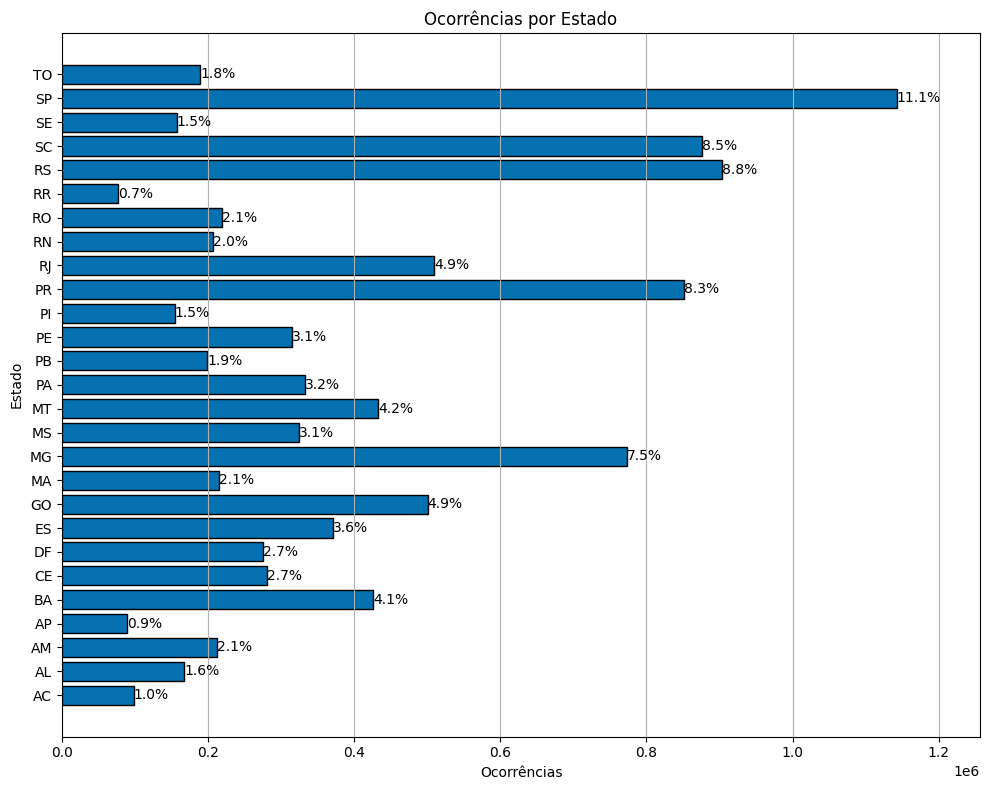

In [9]:
# Agrupando os dados por estado e calculando a contagem de ocorrências.
ocorrencias_por_uf = painel_operacoes_de_credito.groupby('uf').size()

# Criando gráfico de barras horizontais.
fig, ax = plt.subplots(figsize=(10, 8))
plt.barh(ocorrencias_por_uf.index, ocorrencias_por_uf.values, color = '#0571b0', edgecolor='black')

# Definindo título e rótulos dos eixos.
plt.title('Ocorrências por Estado')
plt.xlabel('Ocorrências')
plt.ylabel('Estado')

# Adicionando a contagem de ocorrências em cada barra.
for i, v in enumerate(ocorrencias_por_uf):
    porcentagem = (v / ocorrencias_por_uf.sum()) * 100
    plt.annotate(f'{porcentagem:.1f}%', xy=(v, i), va='center')
    
# Definindo rótulos dos estados no eixo y.
plt.yticks(range(len(ocorrencias_por_uf)), ocorrencias_por_uf.index)

# Definindo limite máximo do eixo x.
plt.xlim(right=ocorrencias_por_uf.values.max()*1.1)

# Ajustando a posição do gráfico.
plt.tight_layout()

# Adicionando grid apenas no eixo x.
plt.grid(axis='x')

# Exibindo gráfico. 
plt.show()

**Observações sobre o número de ocorrências por UF**

* Há uma evolução dos picos ao longo do eixo Y, começando pelo Estado da BA, seguinda de MG, PR, RS e, por último, SP que expressa o maior pico de ocorrências. 
* Por sua vez, notamos uma diferença regional no dataset, já que as regiões que concentram os maiores picos são Sudeste e Sul, seguidos de Nordeste. 


* **Número de ocorrências por Ocupação**

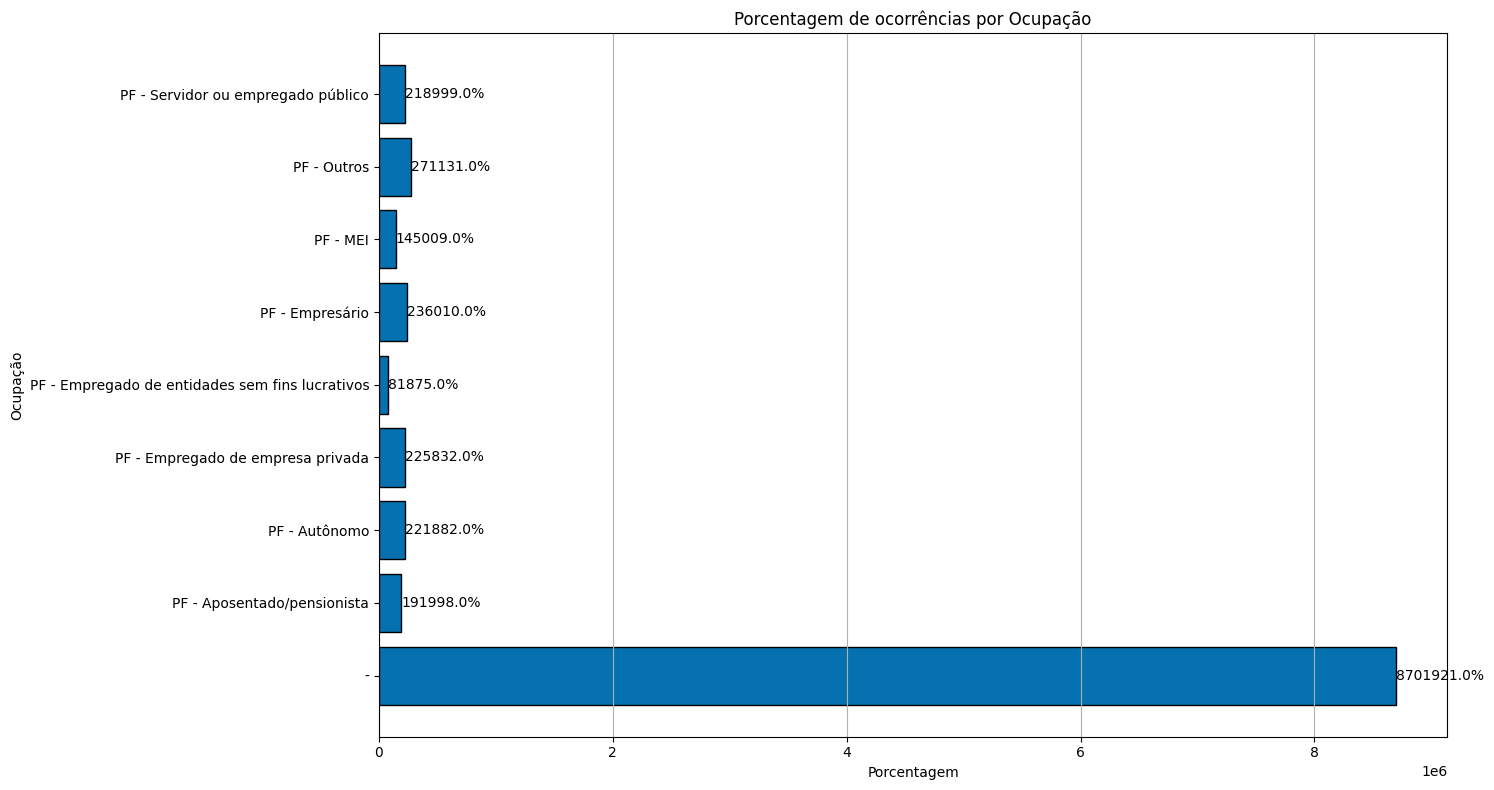

In [10]:
# Agrupando os dados por "sr" e calculando a contagem de ocorrências.
ocorrencias_por_ocupacao = painel_operacoes_de_credito.groupby('ocupacao').size()

# Calculando a porcentagem de ocorrências de cada valor em relação ao total.
porcentagens_por_ocupacao = ocorrencias_por_ocupacao  / ocorrencias_por_ocupacao.sum() * 100

# Criando gráfico de barras horizontais.
fig, ax = plt.subplots(figsize=(15, 8))
plt.barh(ocorrencias_por_ocupacao.index, ocorrencias_por_ocupacao .values, color = '#0571b0', edgecolor='black')

# Adicionando a porcentagem de ocorrências em cada barra.
for i, v in enumerate(ocorrencias_por_ocupacao ):
    plt.annotate(f'{v:.1f}%', xy=(v, i), va='center')

# Definindo título e rótulos dos eixos.
plt.title('Porcentagem de ocorrências por Ocupação')
plt.xlabel('Porcentagem')
plt.ylabel('Ocupação')

# Ajustando a posição do gráfico.
plt.tight_layout()

# Adicionando grid apenas no eixo x.
plt.grid(axis='x')

# Exibindo gráfico. 
plt.show()

**Observações sobre o número de ocorrências por Ocupação**
* A barra com o pico mais alto aparece com rótulo "-" no gráfico, o que indica a presença de registros faltantes (missing values) que não apareceram na função isnull() por estarem preenchidos com um "-".

* **Número de ocorências por Tipo de Consolidado Bancário**

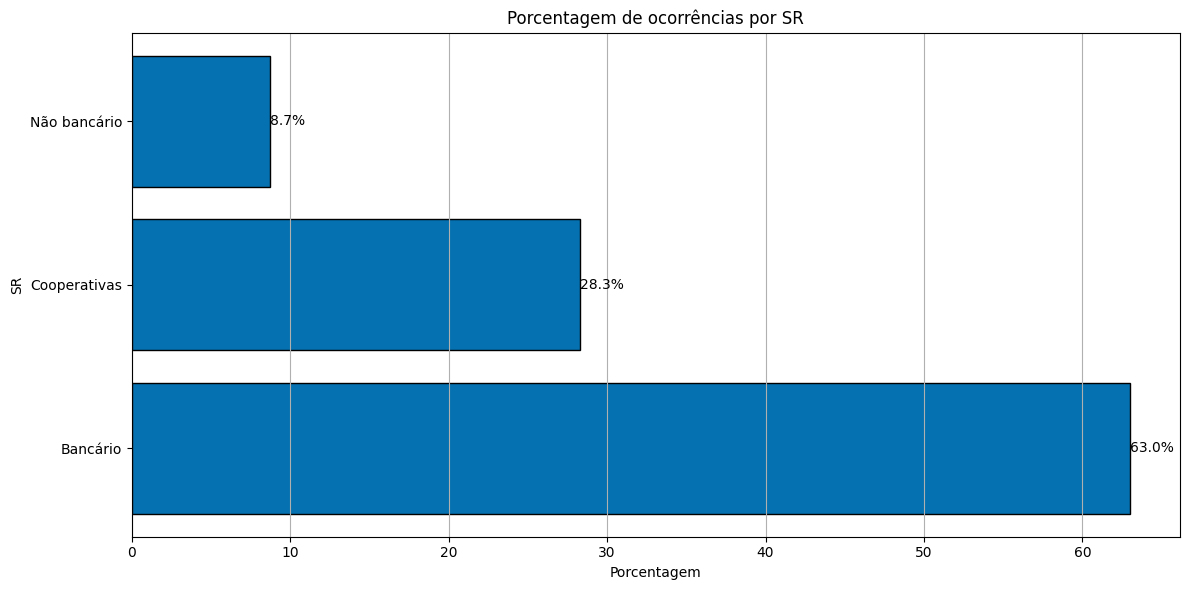

In [11]:
# Agrupando os dados por "sr" e calculando a contagem de ocorrências.
ocorrencias_por_tcb = painel_operacoes_de_credito.groupby('tcb').size()

# Calculando a porcentagem de ocorrências de cada valor em relação ao total.
porcentagens_por_tcb = ocorrencias_por_tcb / ocorrencias_por_tcb.sum() * 100

# Criando o gráfico de barras horizontais.
fig, ax = plt.subplots(figsize=(12, 6))
plt.barh(porcentagens_por_tcb.index, porcentagens_por_tcb.values, color = '#0571b0', edgecolor='black')

# Adicionando a porcentagem de ocorrências em cada barra.
for i, v in enumerate(porcentagens_por_tcb):
    plt.annotate(f'{v:.1f}%', xy=(v, i), va='center')

# Definindo título e rótulos dos eixos.
plt.title('Porcentagem de ocorrências por SR')
plt.xlabel('Porcentagem')
plt.ylabel('SR')

# Ajustando a posição do gráfico.
plt.tight_layout()

# Adicionando grid apenas no eixo x.
plt.grid(axis='x')

# Exibindo gráfico. 
plt.show()

**Observações sobre o número de ocorrências por TCB(Tipo de Consolidado Bancario)**
* No gráfico percebemos que "Bancário" possui maior numéro de ocorrências em comparação a "Cooperativas" e "Não bancários".
* Identificamos que, *mesmo com o crescimento de Instituições Financeiras não bancárias, os Bancos ainda são os principais responsáveis pelo fornecimento de crédito no Brasil*.

* **Número de ocorrências de Segmento de acordo com a Resolução n 4.553/2017**


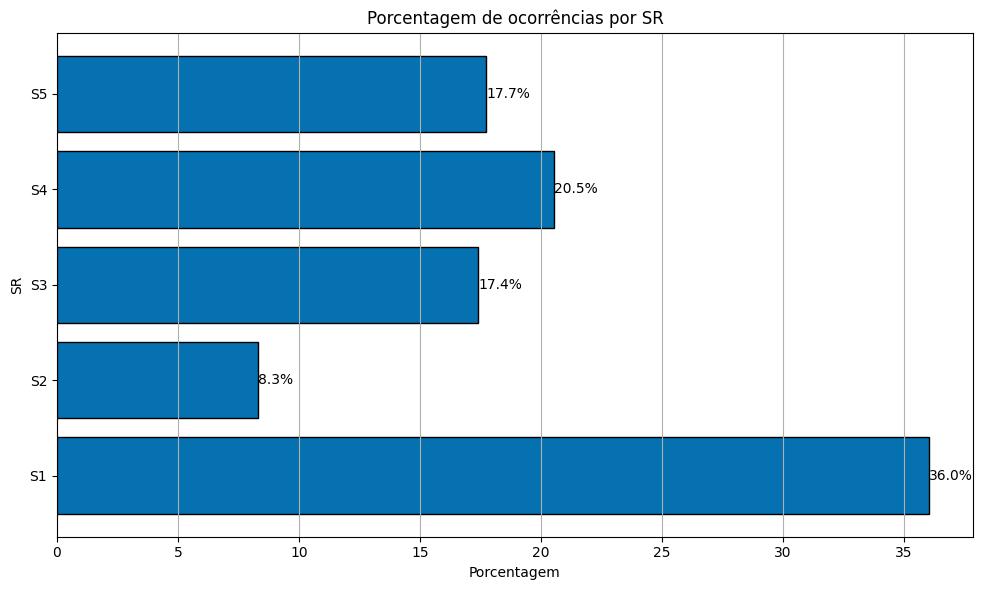

In [12]:
# Agrupando os dados por "sr" e calculando a contagem de ocorrências.
ocorrencias_por_sr = painel_operacoes_de_credito.groupby('sr').size()

# Calculando a porcentagem de ocorrências de cada valor em relação ao total.
porcentagens_por_sr = ocorrencias_por_sr/ocorrencias_por_sr.sum() * 100

# Criando o gráfico de barras horizontais.
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(porcentagens_por_sr.index, porcentagens_por_sr.values, color = '#0571b0', edgecolor='black')

# Adicionando a porcentagem de ocorrências em cada barra.
for i, v in enumerate(porcentagens_por_sr):
    plt.annotate(f'{v:.1f}%', xy=(v, i), va='center')

# Definindo título e rótulos dos eixos.
plt.title('Porcentagem de ocorrências por SR')
plt.xlabel('Porcentagem')
plt.ylabel('SR')

# Ajustando a posição do gráfico.
plt.tight_layout()

# Adicionando grid apenas no eixo x.
plt.grid(axis='x')

# Exibindo gráfico. 
plt.show()

**Observações sobre o número de ocorrências por SR(Seguimento Resolução n 4.553/2017)**
* Percebemos que o seguimento S1 tem predominância, ocupando a maioria das ocorrências;
* Estes são Bancos múltiplos, bancos comerciais, bancos de investimento, bancos de câmbio e caixas econômicas que:
tenham porte igual ou superior a 10% (dez por cento) do Produto Interno Bruto (PIB); ou exerçam atividade internacional relevante, independentemente do porte da instituição;
* Ou seja, os grandes bancos ainda são responsáveis pela maioria do crédito concedido.

* **Número de ocorrências por Modalidade**

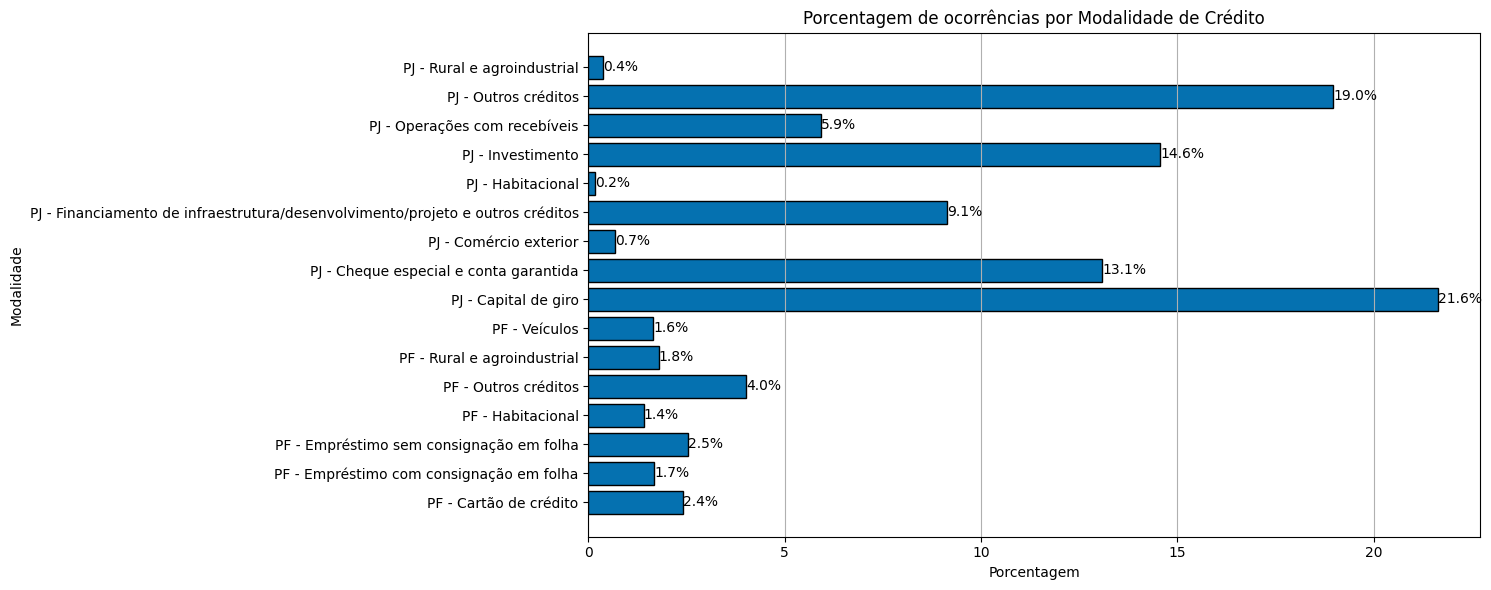

In [13]:
# Agrupando os dados por "modalidade" e calculando a contagem de ocorrências
ocorrencias_por_modalidade = painel_operacoes_de_credito.groupby('modalidade').size()

# Calculando a porcentagem de ocorrências de cada valor em relação ao total.
porcentagens_por_modalidade = ocorrencias_por_modalidade / ocorrencias_por_modalidade.sum() * 100

# Criando o gráfico de barras horizontais.
fig, ax = plt.subplots(figsize=(15, 6))
plt.barh(porcentagens_por_modalidade.index, porcentagens_por_modalidade.values, color = '#0571b0', edgecolor='black')

# Adicionando a porcentagem de ocorrências em cada barra.
for i, v in enumerate(porcentagens_por_modalidade):
    plt.annotate(f'{v:.1f}%', xy=(v, i), va='center')

# Definindo título e rótulos dos eixos.
plt.title('Porcentagem de ocorrências por Modalidade de Crédito')
plt.xlabel('Porcentagem')
plt.ylabel('Modalidade')

# Ajustando a posição do gráfico.
plt.tight_layout()

# Adicionando grid apenas no eixo x.
plt.grid(axis='x')

# Exibindo gráfico. 
plt.show()

**Observações sobre a Frequência por Modalidade de Crédito**
* Os dados apresentam seu pico mais alto em PJ - Capital de Giro, que parece ser a modadalidade de crédito mais popular.
* Esta modalidade é seguida por Outros créditos, Investimento, Cheque especial e conta arantida e Financiamento de infraestrutura. 
* Existe uma predominância de ocorrências de crédito para PJ.

* **Número de ocorrências por Data-base**

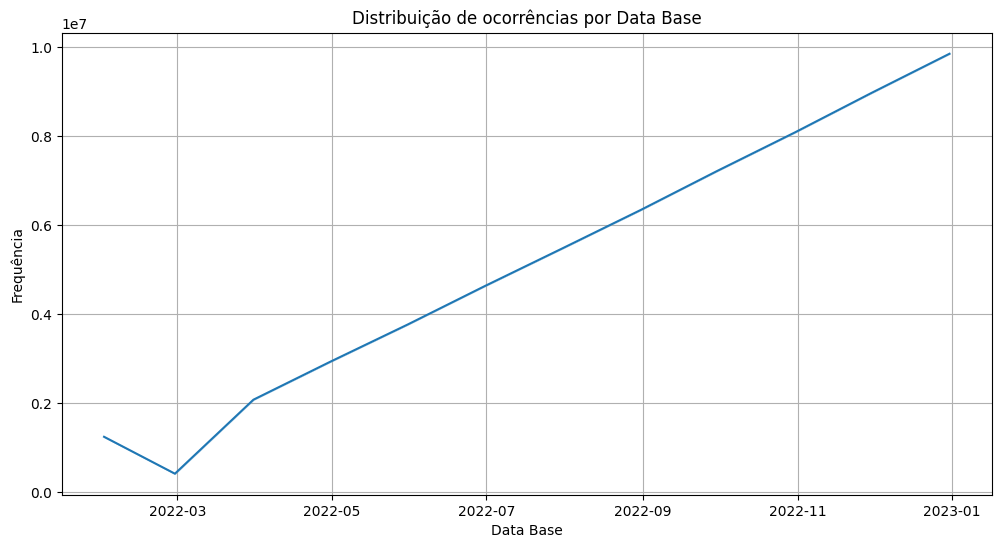

In [14]:
# Converter a coluna 'data_base' para o formato de data.
painel_operacoes_de_credito['data_base'] = pd.to_datetime(painel_operacoes_de_credito['data_base'])

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(data=painel_operacoes_de_credito, x='data_base', y=painel_operacoes_de_credito.index)

# Definindo título e rótulos dos eixos.
plt.title('Distribuição de ocorrências por Data Base', fontsize=12)
plt.xlabel('Data Base', fontsize=10)
plt.ylabel('Frequência', fontsize=10)

# Definindo o tamanho da fonte dos rótulos dos eixos.
plt.tick_params(axis='both', labelsize=10)

# Adicionando grid apenas no eixo x.
plt.grid()

# Exibindo gráfico. 
plt.show()

**Observações sobre o número de ocorrências por data-base**
* Com o gráfico identitificamos um claro padrão sazional nas operações. Há um crescimento ao longo dos trimestres.
* Janeiro representa o período de menor recorrência em relação a Dezembro como mês de maior ocorrência. 
* O pico em Dezembro pode estar relacionado a alguns fatores: tendência de gastos em decorrência do período defestas e férias; temporada de compras com descontos mais atrativos; pagamento do décimo terceiro salário. 
* Em oposição, o declínio em Janeiro pode representar: controle de gastos em decorrência das dividas geradas no fim do ano anterior; comprometimento de orçamento. 

##**III. Pré-processamento de dados**

Durante a etapa de análise notamos alguns pontos que orietarão nosso processo de tratamento e limpeza de dados:

1.  O dados das variáveis numéricas foram armazenados como "string", o que dificulta a análise dos dados numéricos e a realização de operações matemáticas.
2.   Direcionaremos nossa análise ao tipo de cliente Pessoa Fisica e ao segmento S1, já que correpondem ao maiores grupos do segmento bancário e representam a maioria das ocorrências no dataset analisado. 
3. Nosso objetivo é analisar os dados de operações de crédito com possível inadimplência. Para isso focaremos nas variáveis 'ativos_problemáticos'.
4. Nesse sentido, reduziremos a dimensionalidade do dataset excluindo as variáveis com dados ausentes ou que consideremos pouco relevantes para a análise, especificamente as colunas: 'tcb', 'cnae_secao', 'cnae_subclasse', 'a_vencer_ate_90_dias',	'a_vencer_de_91_ate_360_dias',	'a_vencer_de_361_ate_1080_dias',	'a_vencer_de_1081_ate_1800_dias',	'a_vencer_de_1801_ate_5400_dias',	'a_vencer_acima_de_5400_dias'e	'vencido_acima_de_15_dias'.







* Excluindo colunas com valores faltantes ou com pouca relevância para nosso objetivo




In [15]:
# Excluindo colunas e criando novo dataframe.
colunas_para_excluir = ['tcb', 'cnae_secao', 'cnae_subclasse', 'a_vencer_ate_90_dias',	'a_vencer_de_91_ate_360_dias',	'a_vencer_de_361_ate_1080_dias',	'a_vencer_de_1081_ate_1800_dias',	'a_vencer_de_1801_ate_5400_dias',	'a_vencer_acima_de_5400_dias',	'vencido_acima_de_15_dias']
painel_operacoes_de_credito_por_s1_e_pf= painel_operacoes_de_credito.drop(colunas_para_excluir, axis =1)

* Verificando se a exclusão de colunas foi feita corretamente




In [16]:
# Verificando as colunas existentes no dataframe.
painel_operacoes_de_credito_por_s1_e_pf.columns

Index(['data_base', 'uf', 'sr', 'cliente', 'ocupacao', 'porte', 'modalidade',
       'origem', 'indexador', 'numero_de_operacoes', 'carteira_ativa',
       'carteira_inadimplida_arrastada', 'ativo_problematico'],
      dtype='object')

* **Criamos um subset compatível com o objetivo de nossa análise**: filtrando a variável 'sr' apenas para o segmento 'S1', e a variável 'cliente' somente com as ocorrências 'PF(Pessoa Física)'.

In [17]:
# Filtrando as colunas 'sr' e 'cliente'.
painel_operacoes_de_credito_por_s1_e_pf = painel_operacoes_de_credito_por_s1_e_pf[(painel_operacoes_de_credito_por_s1_e_pf['sr'] == 'S1') & (painel_operacoes_de_credito_por_s1_e_pf['cliente'] == 'PF')]

* Verificamos se os filtros foram feitos corretamente:

In [18]:
# Verificando se a coluna 'sr' foi filtrada corretamente.
painel_operacoes_de_credito_por_s1_e_pf['sr'].unique()

array(['S1'], dtype=object)

In [19]:
# Verificando se a coluna 'cliente' foi filtrada corretamente.
painel_operacoes_de_credito_por_s1_e_pf['cliente'].unique()

array(['PF'], dtype=object)

In [20]:
# verificando as primeiras linhas do dataset. 
painel_operacoes_de_credito_por_s1_e_pf.head()

,data_base,uf,sr,cliente,ocupacao,porte,modalidade,origem,indexador,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
0,2022-02-28,AC,S1,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,Outros indexadores,<= 15,"4083,90","0,00","0,00"
1,2022-02-28,AC,S1,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,Prefixado,715,"5010337,59","138651,78","255270,55"
2,2022-02-28,AC,S1,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo com consignação em folha,Sem destinação específica,Prefixado,712,"39010789,68","992864,05","1081166,33"
3,2022-02-28,AC,S1,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo sem consignação em folha,Sem destinação específica,Prefixado,143,"3214603,84","7853,08","127688,18"
4,2022-02-28,AC,S1,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Pós-fixado,23,"3940375,22","0,00","101413,34"


*   **Convertemos o tipo das colunas do tipo 'object' para 'string', 'integer' e 'float', de acordo com o tipo de dado mais adequado a cada variável. Para isso, primeiro tivemos que converter as vírgulas em pontos, substituir o str "," por ".".**



In [21]:
# Substituindo "," por ".".
painel_operacoes_de_credito_por_s1_e_pf= painel_operacoes_de_credito_por_s1_e_pf.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Mudando o tipo das colunas.
painel_operacoes_de_credito_por_s1_e_pf['data_base'] = pd.to_datetime(painel_operacoes_de_credito_por_s1_e_pf['data_base'])
painel_operacoes_de_credito_por_s1_e_pf[['uf', 'sr', 'cliente', 'ocupacao', 'porte', 'modalidade', 'origem', 'indexador']] = painel_operacoes_de_credito_por_s1_e_pf[['uf', 'sr', 'cliente', 'ocupacao', 'porte', 'modalidade', 'origem', 'indexador']].astype('string')
painel_operacoes_de_credito_por_s1_e_pf["numero_de_operacoes"] = pd.to_numeric(painel_operacoes_de_credito_por_s1_e_pf["numero_de_operacoes"], errors="coerce").astype("Int64")
painel_operacoes_de_credito_por_s1_e_pf[[ 'carteira_ativa', 'carteira_inadimplida_arrastada', 'ativo_problematico']] = painel_operacoes_de_credito_por_s1_e_pf[['carteira_ativa', 'carteira_inadimplida_arrastada', 'ativo_problematico']].astype('float')


In [22]:
# Verificando se a alteração foi bem sucedida. 
painel_operacoes_de_credito_por_s1_e_pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413052 entries, 0 to 10279427
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data_base                       413052 non-null  datetime64[ns]
 1   uf                              413052 non-null  string        
 2   sr                              413052 non-null  string        
 3   cliente                         413052 non-null  string        
 4   ocupacao                        413052 non-null  string        
 5   porte                           413052 non-null  string        
 6   modalidade                      413052 non-null  string        
 7   origem                          413052 non-null  string        
 8   indexador                       413052 non-null  string        
 9   numero_de_operacoes             238813 non-null  Int64         
 10  carteira_ativa                  413052 non-null  float

* Vemos que a colunas operações está com dados nulos, devido a um formato inválido para esta variável.
 "<=15" se refere ao número de operações que são inferiores ou iguais a 15. 
 * Para padronizar os dados, vamos transformar todos esses valores em 15, para que não sejam mais lidos como nulos, como ocorreu após a conversão dos dados da variável 'numero_de_operacoes' para int.


In [23]:
# Substituindo os valores nulos da variável 'numero_de_operações' por 15.
painel_operacoes_de_credito_por_s1_e_pf['numero_de_operacoes'] = painel_operacoes_de_credito_por_s1_e_pf['numero_de_operacoes'].fillna(15)

In [24]:
# Exibindo novamente as informações dos atributos do dataset. 
painel_operacoes_de_credito_por_s1_e_pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413052 entries, 0 to 10279427
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data_base                       413052 non-null  datetime64[ns]
 1   uf                              413052 non-null  string        
 2   sr                              413052 non-null  string        
 3   cliente                         413052 non-null  string        
 4   ocupacao                        413052 non-null  string        
 5   porte                           413052 non-null  string        
 6   modalidade                      413052 non-null  string        
 7   origem                          413052 non-null  string        
 8   indexador                       413052 non-null  string        
 9   numero_de_operacoes             413052 non-null  Int64         
 10  carteira_ativa                  413052 non-null  float

* **Verificamos que o tipo de dado das variáveis foi alterado com sucesso e que elas não possuem mais nulos.**

In [25]:
# Verificando o numero de valores faltantes.  
painel_operacoes_de_credito_por_s1_e_pf.isnull().sum()

data_base                         0
uf                                0
sr                                0
cliente                           0
ocupacao                          0
porte                             0
modalidade                        0
origem                            0
indexador                         0
numero_de_operacoes               0
carteira_ativa                    0
carteira_inadimplida_arrastada    0
ativo_problematico                0
dtype: int64

* Notamos que não há mais valores nulos na variável 'numero_de_operacoes'.

###**Refazendo a estatística descritiva e gerando novas visualizações** 



In [26]:
# Fazendo um resumo estatístico das colunas numéricas.
print(painel_operacoes_de_credito_por_s1_e_pf.describe())

       numero_de_operacoes  carteira_ativa  carteira_inadimplida_arrastada  \
count             413052.0    4.130520e+05                    4.130520e+05   
mean           8990.469553    6.561415e+07                    2.026612e+06   
std           99111.806223    4.642183e+08                    1.299410e+07   
min                   15.0    1.050000e+00                    0.000000e+00   
25%                   15.0    1.351754e+05                    0.000000e+00   
50%                   30.0    1.045382e+06                    1.729101e+04   
75%                  563.0    1.193680e+07                    5.488298e+05   
max             11173261.0    2.504170e+10                    1.321535e+09   

       ativo_problematico  
count        4.130520e+05  
mean         4.635114e+06  
std          2.865101e+07  
min          0.000000e+00  
25%          0.000000e+00  
50%          8.121205e+04  
75%          1.174732e+06  
max          1.708376e+09  


* Notamos que agora os dados das variáveis numéricas estão no formato adequado, nos permitindo realizar o resumo estatístico;
* Percebemos que em todas as variáveis numéricas estão com desvio padrão muito alto, o que sugere que os dados estão dispersos em relação a mediana;
* Os valores máximos também são muito maiores que o terceito quartil, o que pode sugerir a presença de outliers. É possivel que os outliers sejam devido 
a alta variabilidade do dataset;
* Isso se verifica, ao analisarmos a variavel 'modalidade', pois notamos que há um agrupamento muito diverso, como 'cartão de crédito', 'habitacional', 'rural' e 'agroindustria', 'veículos' etc. O que pode estar implicando, por sua vez, em uma variabilidade grande dos valores e créditos presentes no dataset. 
* Por fim, notamos diferenças significativas de magnitude das variáveis. Por exemplo, o número de operações varia de 15 a 11.173.261, enquanto a carteira ativa varia de 1,05 a 25.041.700.000. O que nos gera a necessedidade de padronizar as variáveis para evitar que as diferenças nas magnitudes influenciem indevidamente os modelos de análise de dados.

**Realizando a padronização dos dados nas variáveis numéricas**

In [49]:
# Selecionando apenas as colunas numéricas
df_variaveis_numericas = painel_operacoes_de_credito_por_s1_e_pf.select_dtypes(include=['int', 'float'])

# Criando uma instância do MinMaxScaler e normalizando os dados
scaler = MinMaxScaler()
df_padronizado = scaler.fit_transform(df_variaveis_numericas)

# Convertendo o array resultante em um DataFrame e atribuir os nomes das colunas
df_padronizado = pd.DataFrame(df_padronizado, columns=df_variaveis_numericas.columns)

# Substituindo os dados normalizados nas colunas numéricas do DataFrame original
painel_operacoes_de_credito_por_s1_e_pf.update(df_padronizado)

print(df_padronizado.describe())

       carteira_ativa  carteira_inadimplida_arrastada  ativo_problematico
count   413052.000000                   413052.000000       413052.000000
mean         0.002534                        0.001484            0.002627
std          0.018411                        0.009771            0.016665
min          0.000000                        0.000000            0.000000
25%          0.000004                        0.000000            0.000000
50%          0.000034                        0.000006            0.000032
75%          0.000411                        0.000363            0.000604
max          1.000000                        1.000000            1.000000


* Comparando os dois resumos estatísticos dos dados, podemos observar que houve uma transformação dos valores originais para uma escala de 0 a 1 no segundo resumo estatístico. 
* A normalização dos dados foi realizada para colocar todas as colunas em uma escala comum, facilitando a comparação e interpretação dos dados. 
*  Ao transformar os dados em uma escala de 0 a 1, os valores das diferentes colunas passam a ter uma comparação mais direta entre si, independentemente de suas magnitudes originais. Isso pode ser útil em algumas análises e modelos de machine learning que se baseiam em valores normalizados.

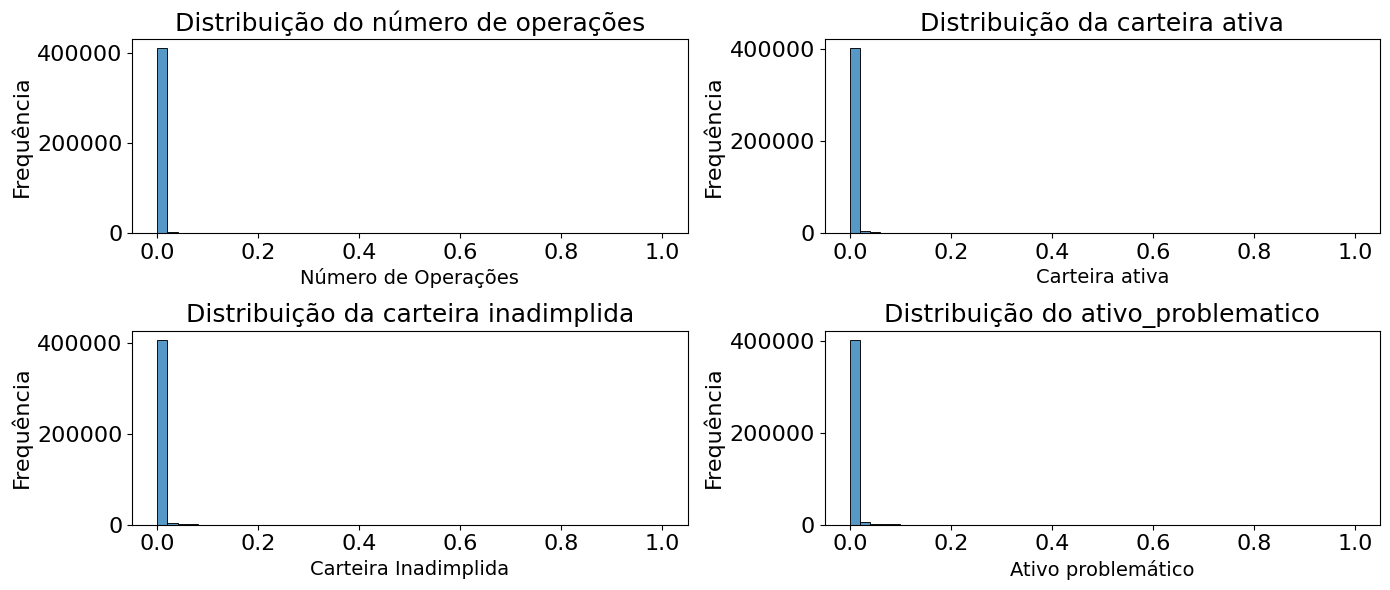

In [39]:
# Criando um subplot de histogramas para cada uma das variáveis numéricas.
fig, ax = plt.subplots(2, 2, figsize=(14, 6))

# Plotando a frequência do número de operações.
sns.histplot(data=df_padronizado, x='numero_de_operacoes', bins=50, ax=ax[0,0])
ax[0,0].set_title('Distribuição do número de operações', fontsize=18)
ax[0,0].set_xlabel('Número de Operações', fontsize=14)
ax[0,0].set_ylabel('Frequência', fontsize=16)
ax[0,0].tick_params(axis='both', labelsize=16)

# Plotando a frequência da carteira ativa.
sns.histplot(data=df_padronizado, x='carteira_ativa', bins=50, ax=ax[0,1])
ax[0,1].set_title('Distribuição da carteira ativa', fontsize=18)
ax[0,1].set_xlabel('Carteira ativa', fontsize=14)
ax[0,1].set_ylabel('Frequência', fontsize=16)
ax[0,1].tick_params(axis='both', labelsize=16)

# Plotando a frequência da carteira inadimplida arrastada.
sns.histplot(data=df_padronizado, x='carteira_inadimplida_arrastada', bins=50, ax=ax[1,0])
ax[1,0].set_title('Distribuição da carteira inadimplida', fontsize=18)
ax[1,0].set_xlabel('Carteira Inadimplida', fontsize=14)
ax[1,0].set_ylabel('Frequência', fontsize=16)
ax[1,0].tick_params(axis='both', labelsize=16)

# Plotando a frequência dos ativos problemáticos.
sns.histplot(data=df_padronizado, x='ativo_problematico', bins=50, ax=ax[1,1])
ax[1,1].set_title('Distribuição do ativo_problematico', fontsize=18)
ax[1,1].set_xlabel('Ativo problemático', fontsize=14)
ax[1,1].set_ylabel('Frequência', fontsize=16)
ax[1,1].tick_params(axis='both', labelsize=16)

# Ajustando os gráficos.
plt.tight_layout()

# Exibindo os gráficos.
plt.show()

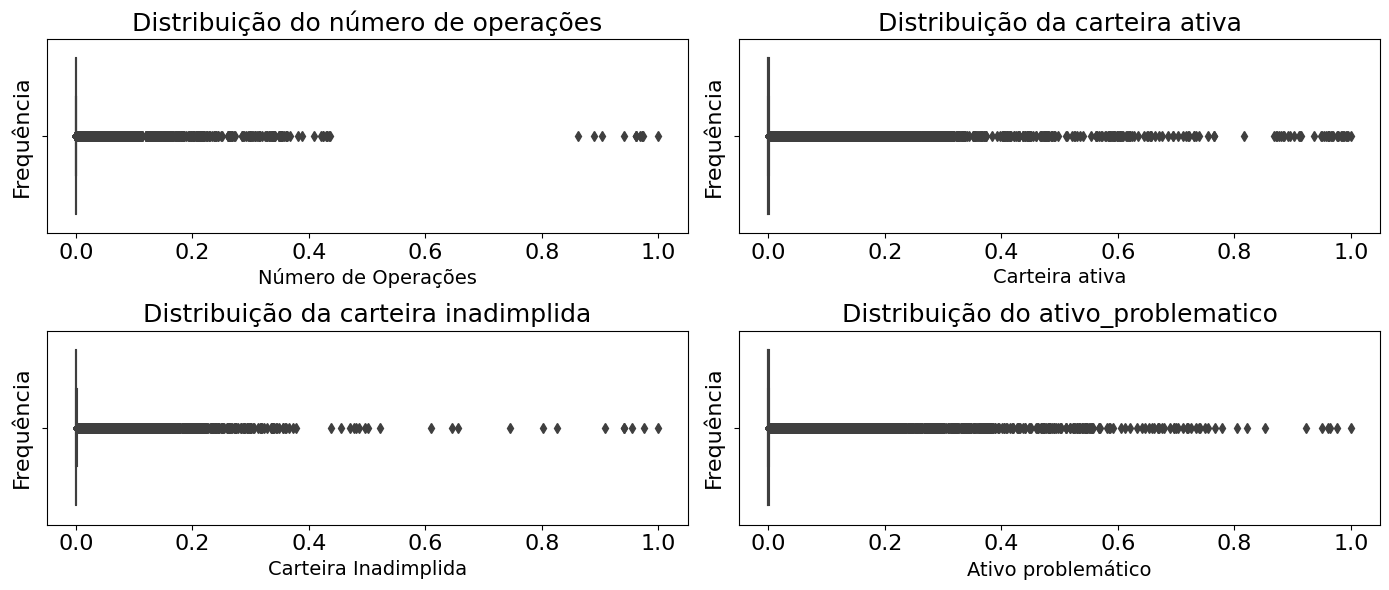

In [40]:
# Criando um subplot de boxplots para cada uma das variáveis numéricas.
fig, ax = plt.subplots(2, 2, figsize=(14, 6))

# Plotando o boxplot do número de operações.
sns.boxplot(data=df_padronizado, x='numero_de_operacoes', ax=ax[0,0])
ax[0,0].set_title('Distribuição do número de operações', fontsize=18)
ax[0,0].set_xlabel('Número de Operações', fontsize=14)
ax[0,0].set_ylabel('Frequência', fontsize=16)
ax[0,0].tick_params(axis='both', labelsize=16)

# Plotando o boxplot da carteira ativa.
sns.boxplot(data=df_padronizado, x='carteira_ativa', ax=ax[0,1])
ax[0,1].set_title('Distribuição da carteira ativa', fontsize=18)
ax[0,1].set_xlabel('Carteira ativa', fontsize=14)
ax[0,1].set_ylabel('Frequência', fontsize=16)
ax[0,1].tick_params(axis='both', labelsize=16)

# Plotando o boxplot da carteira inadimplida arrastada.
sns.boxplot(data=df_padronizado, x='carteira_inadimplida_arrastada', ax=ax[1,0])
ax[1,0].set_title('Distribuição da carteira inadimplida', fontsize=18)
ax[1,0].set_xlabel('Carteira Inadimplida', fontsize=14)
ax[1,0].set_ylabel('Frequência', fontsize=16)
ax[1,0].tick_params(axis='both', labelsize=16)

# Plotando o boxplot dos ativos problemáticos.
sns.boxplot(data=df_padronizado, x='ativo_problematico', ax=ax[1,1])
ax[1,1].set_title('Distribuição do ativo_problematico', fontsize=18)
ax[1,1].set_xlabel('Ativo problemático', fontsize=14)
ax[1,1].set_ylabel('Frequência', fontsize=16)
ax[1,1].tick_params(axis='both', labelsize=16)

# Ajustando os gráficos.
plt.tight_layout()

# Exibindo os gráficos.
plt.show()

Observações: No histograma e no gráfico boxplot temos uma visualização distorcida, possivelmente gerada pelo alto grau de dispersão causada pela grande variabilidade de dados no dataset, como explicado no resumo estatístico anterior. 

* **Distribuição de Ativos Problemáticos por Estado**

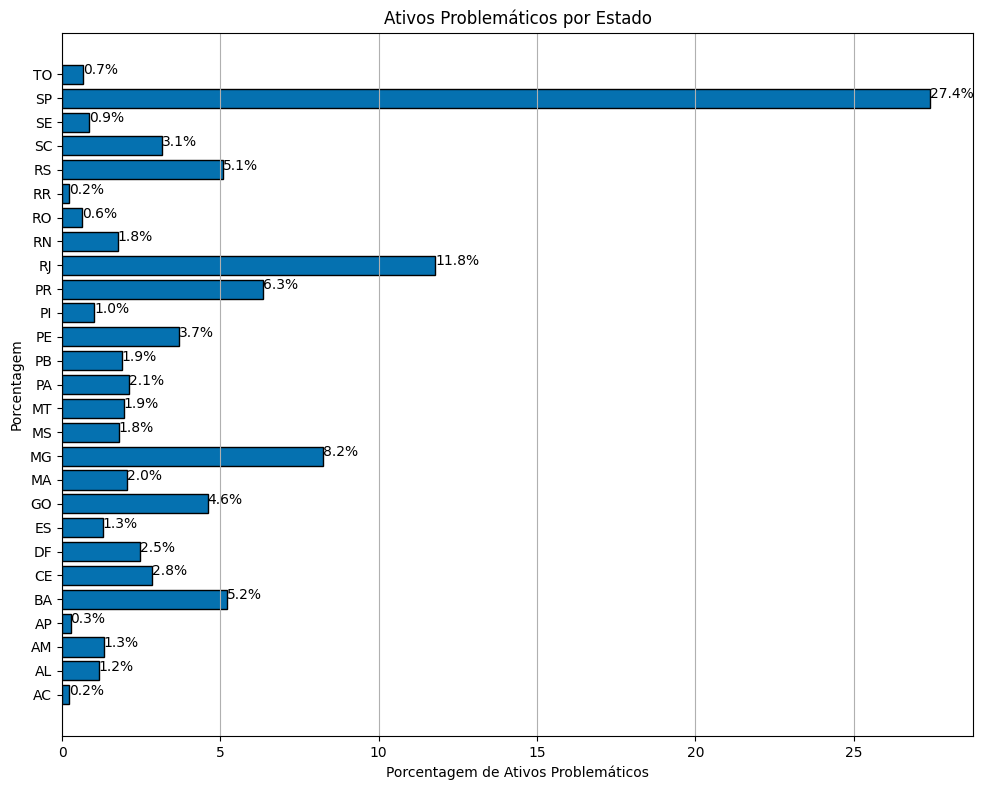

In [43]:
# Agrupando os dados por Estado e calculando a porcentagem de ativos problemáticos.
ativo_problematico_por_uf = painel_operacoes_de_credito_por_s1_e_pf.groupby('uf')['ativo_problematico'].sum()

# Calculando a porcentagem de ativos problemáticos por estado.
porcentagem_por_uf = (ativo_problematico_por_uf / ativo_problematico_por_uf.sum()) * 100

# Criando o gráfico de barras horizontais.
plt.figure(figsize=(10, 8))
plt.barh(porcentagem_por_uf.index, porcentagem_por_uf, color = '#0571b0', edgecolor='black')

# Definindo título e rótulos dos eixos.
plt.title('Ativos Problemáticos por Estado')
plt.xlabel('Porcentagem de Ativos Problemáticos')
plt.ylabel('Porcentagem')

# Adicionando a porcentagem de ativos problemáticos em cada barra.
for i, v in enumerate(porcentagem_por_uf):
    plt.text(v, i, f'{v:.1f}%')

# Ajustando a posição do gráfico.
plt.tight_layout()

# Adicionando grid apenas no eixo x.
plt.grid(axis='x')
plt.gca().ticklabel_format(style='plain', axis='x')

# Exibindo gráfico. 
plt.show()

**Observações**: Forte concentração de ativos problemáticos em SP. Somados, os estados do Sudeste correspondem a 47,9% dos ativos problemáticos.

* **Porcentagem dos Ativos Problemáticos por Ocupação**

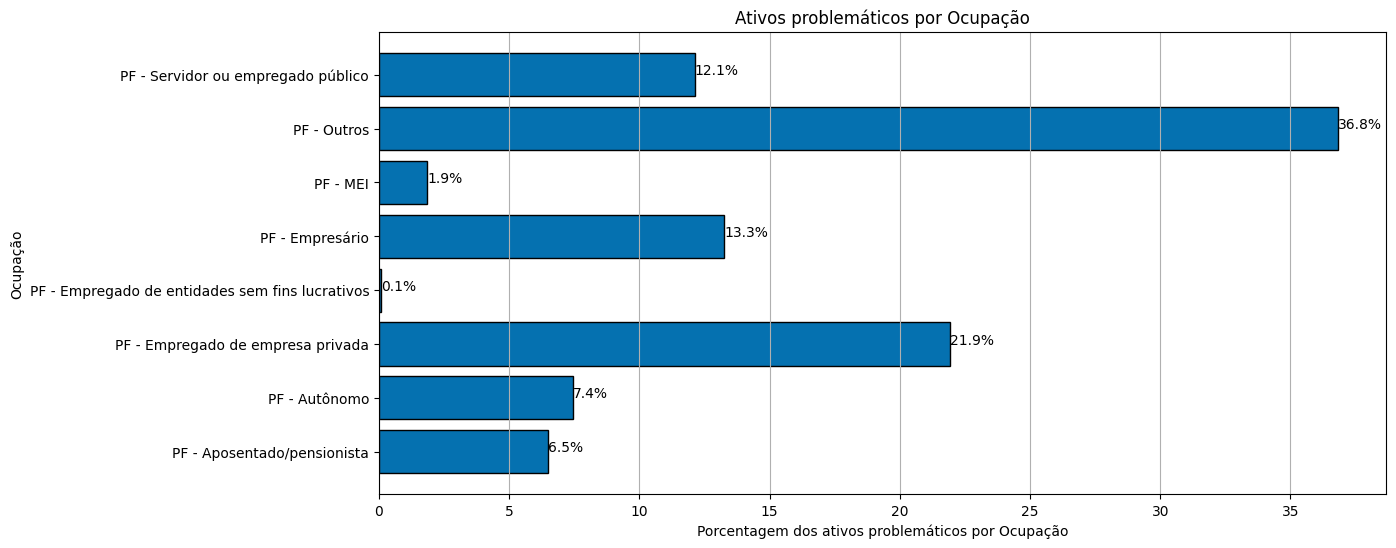

In [44]:
# Agrupando os dados por Ocupação e calculando a porcentagem de ativos problemáticos.
ativos_problematicos_por_ocupacao = painel_operacoes_de_credito_por_s1_e_pf.groupby('ocupacao')['ativo_problematico'].sum()

# Calculando a porcentagem de ativos problemáticos por estado.
porcentagem_ativos_problematicos_por_ocupacao = (ativos_problematicos_por_ocupacao/ativos_problematicos_por_ocupacao.sum()) * 100

# Criando o gráfico de barras horizontais.
fig, ax = plt.subplots(figsize=(13, 6))
plt.barh(porcentagem_ativos_problematicos_por_ocupacao.index, porcentagem_ativos_problematicos_por_ocupacao, color = '#0571b0', edgecolor='black')

# Definindo título e rótulos dos eixos.
ax.set_xlabel('Porcentagem dos ativos problemáticos por Ocupação')
ax.set_ylabel('Ocupação')
ax.set_title('Ativos problemáticos por Ocupação')

# Adicionando a porcentagem de ativos problemáticos em cada barra.
for i, v in enumerate(porcentagem_ativos_problematicos_por_ocupacao):
    plt.text(v, i, f'{v:.1f}%')

# Adicionando grid apenas no eixo x.
plt.grid(axis='x')

# Retira notação científica
plt.gca().ticklabel_format(style='plain', axis='x')

# Exibindo gráfico.
plt.show()

**Observação:** Verificamos forte concentração dos ativos problemáticos em 'PF - Outros' e 'PF - Empregado de empresa privada'

* **Percentual de ativos problemáticos por data-base**

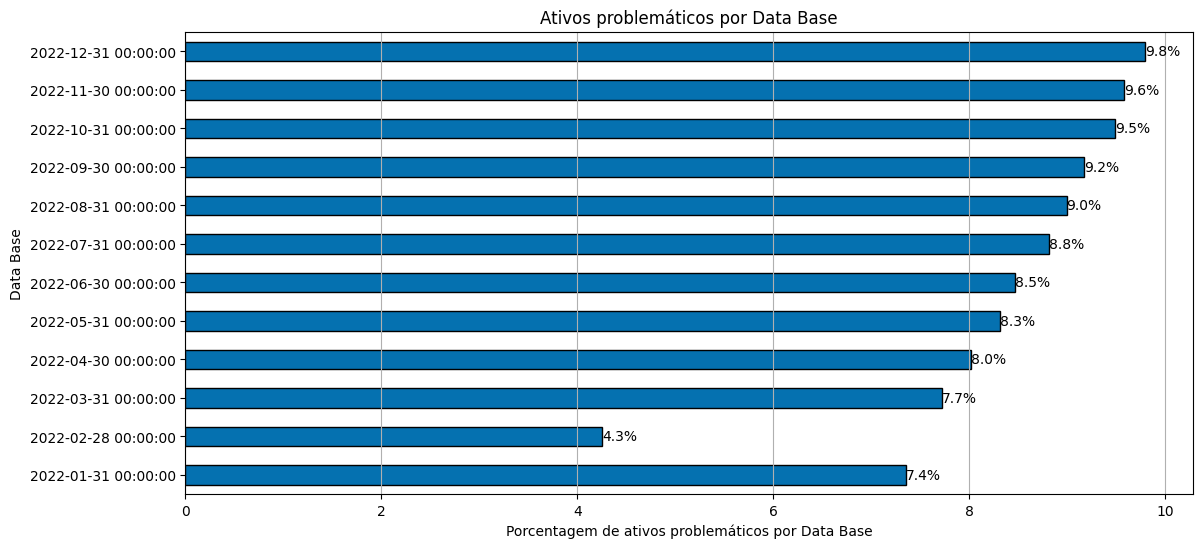

In [47]:
# Agrupando os dados por Data Base e calculando a porcentagem de ativos problemáticos.
ativos_problematicos_por_data_base = painel_operacoes_de_credito_por_s1_e_pf.groupby('data_base')['ativo_problematico'].sum()

# Calculando a porcentagem de ativos problemáticos por data base.
porcentagem_ativos_problematicos_por_data_base = (ativos_problematicos_por_data_base / ativos_problematicos_por_data_base.sum()) * 100

# Criando o gráfico de barras horizontais.
fig, ax = plt.subplots(figsize=(13, 6))
porcentagem_ativos_problematicos_por_data_base.plot(kind='barh', ax=ax, color = '#0571b0', edgecolor='black')

# Definindo título e rótulos dos eixos.
ax.set_xlabel('Porcentagem de ativos problemáticos por Data Base')
ax.set_ylabel('Data Base')
ax.set_title('Ativos problemáticos por Data Base')

# Adicionando a porcentagem de ativos problemáticos em cada barra.
for i, v in enumerate(porcentagem_ativos_problematicos_por_data_base):
    ax.annotate(f'{v:.1f}%', xy=(v, i), va='center')

# Adicionando grid apenas no eixo x.
plt.grid(axis='x')

# Exibindo gráfico.
plt.show()

**Observações:** Como apontado na fase anterior, as operações de crédito seguem um padrão sazonal, com o seu pico mais elevado no mês de Dezembro, período em que está concentrada a maioria das operações consideradas possíveis ativos probléticos. 

* **Percentual de Ativos Problemáticos por Porte do cliente**

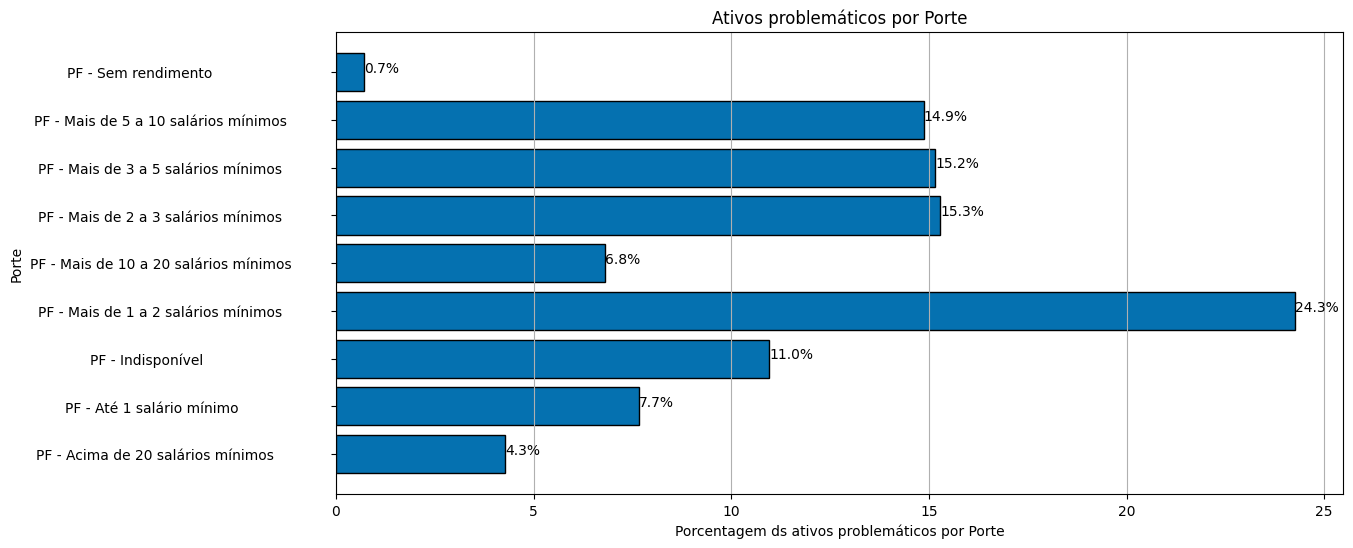

In [50]:
# Agrupando os dados por Porte e calculando a porcentagem de ativos problemáticos.
ativos_problematicos_por_porte = painel_operacoes_de_credito_por_s1_e_pf.groupby('porte')['ativo_problematico'].sum()

# Calculando a porcentagem de ativos problemáticos por porte.
porcentagem_ativos_problematicos_por_porte = (ativos_problematicos_por_porte/ativos_problematicos_por_porte.sum()) * 100

# Criando o gráfico de barras horizontais.
fig, ax = plt.subplots(figsize=(13, 6))
ax.barh(porcentagem_ativos_problematicos_por_porte.index, porcentagem_ativos_problematicos_por_porte, color = '#0571b0', edgecolor='black')

# Definindo título e rótulos dos eixos.
ax.set_xlabel('Porcentagem ds ativos problemáticos por Porte')
ax.set_ylabel('Porte')
ax.set_title('Ativos problemáticos por Porte')

# Adicionando a porcentagem de ativos problemáticos em cada barra.
for i, v in enumerate(porcentagem_ativos_problematicos_por_porte):
    plt.text(v, i, f'{v:.1f}%')

# Adicionando grid apenas no eixo x.
ax.grid(axis='x')

# Exibindo gráfico.
plt.show()

**Observações:** Verificamos que os valores de ativos problemáticos concentram-se na faixa de renda de Mais de 1 a 2 salários mínimos. De  uma forma geral, há uma decrescente de ativos problemáticos conforme cresce a faixa de renda. Para 11% dos dados, não sabemos o porte.

* **Percentual de Ativos Problemáticos por Origem do crédito**

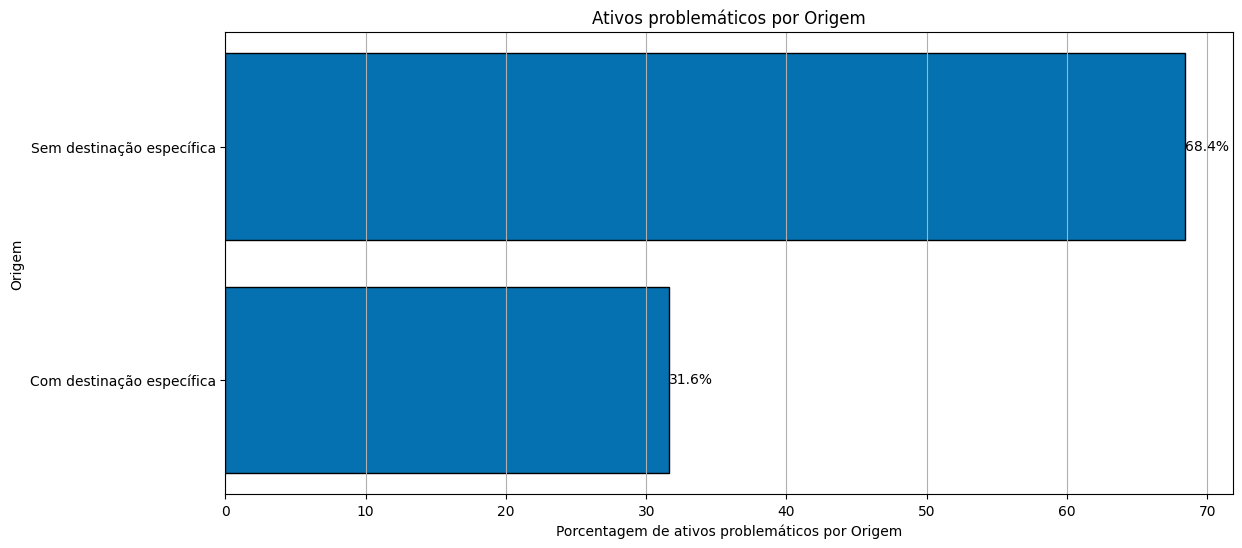

In [51]:
# Agrupando os dados por Origem e calculando a porcentagem de ativos problemáticos.
ativos_problematicos_por_origem = painel_operacoes_de_credito_por_s1_e_pf.groupby('origem')['ativo_problematico'].sum()

# Calculando a porcentagem de ativos problemáticos por porte.
porcentagem_ativos_ativos_problematicos_por_origem = (ativos_problematicos_por_origem/ativos_problematicos_por_origem.sum()) * 100

# Criando o gráfico de barras horizontais.
fig, ax = plt.subplots(figsize=(13, 6))
ax.barh(porcentagem_ativos_ativos_problematicos_por_origem.index, porcentagem_ativos_ativos_problematicos_por_origem, color = '#0571b0', edgecolor='black')

# Definindo título e rótulos dos eixos.
ax.set_xlabel('Porcentagem de ativos problemáticos por Origem')
ax.set_ylabel('Origem')
ax.set_title('Ativos problemáticos por Origem')

# Adicionando a porcentagem de ativos problemáticos em cada barra.
for i, v in enumerate(porcentagem_ativos_ativos_problematicos_por_origem):
    ax.annotate(f'{v:.1f}%', xy=(v, i), va='center')

# Adicionando grid apenas no eixo x.
plt.grid(axis='x')
plt.gca().ticklabel_format(style='plain', axis='x')

# Exibindo gráfico.
plt.show()

**Observações:** Há uma concentração da inadimplência, expressa no montante de ativos problemáticos, no crédito sem destinação específica.

* **Percentual de Ativos Problemáticos por Indexador**

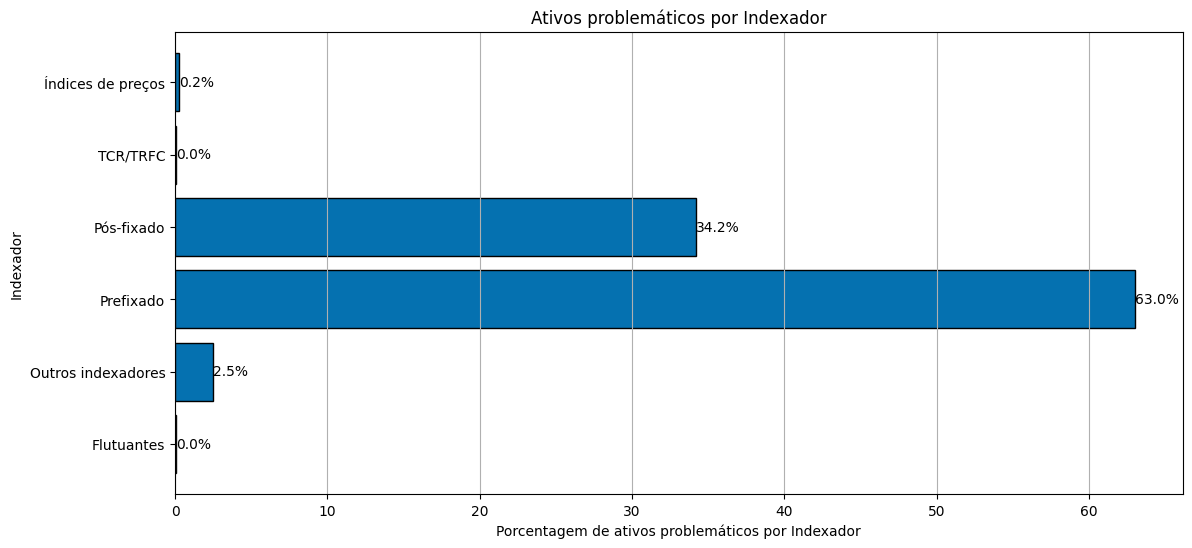

In [52]:
# Agrupando os dados por Indexador e calculando a porcentagem de ativos problemáticos.
ativos_problematicos_por_indexador = painel_operacoes_de_credito_por_s1_e_pf.groupby('indexador')['ativo_problematico'].sum()

# Calculando a porcentagem de ativos problemáticos por porte.
porcentagem_ativos_ativos_ativos_problematicos_por_indexador= (ativos_problematicos_por_indexador/ativos_problematicos_por_indexador.sum()) * 100

# Criando o gráfico de barras horizontais.
fig, ax = plt.subplots(figsize=(13, 6))
ax.barh(porcentagem_ativos_ativos_ativos_problematicos_por_indexador.index, porcentagem_ativos_ativos_ativos_problematicos_por_indexador, color = '#0571b0', edgecolor='black')

# Definindo título e rótulos dos eixos.
ax.set_xlabel('Porcentagem de ativos problemáticos por Indexador')
ax.set_ylabel('Indexador')
ax.set_title('Ativos problemáticos por Indexador')

# Adicionando a porcentagem de ativos problemáticos em cada barra.
for i, v in enumerate(porcentagem_ativos_ativos_ativos_problematicos_por_indexador):
    ax.annotate(f'{v:.1f}%', xy=(v, i), va='center')

# Adicionando grid apenas no eixo x.
plt.grid(axis='x')

# Exibindo gráfico.
plt.show()

**Observações:** Os ativos problemáticos concentram-se em empréstimos a taxas de juros pré-fixadas, que representam mais de 60% destes.

* **Série Temporal da Distribuição dos Ativos Problemáticos por Modalidade de Crédito**

<ipython-input-53-4cbd705b6035>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_s1grouped = painel_operacoes_de_credito_por_s1_e_pf.groupby(['data_base', 'modalidade']).sum()


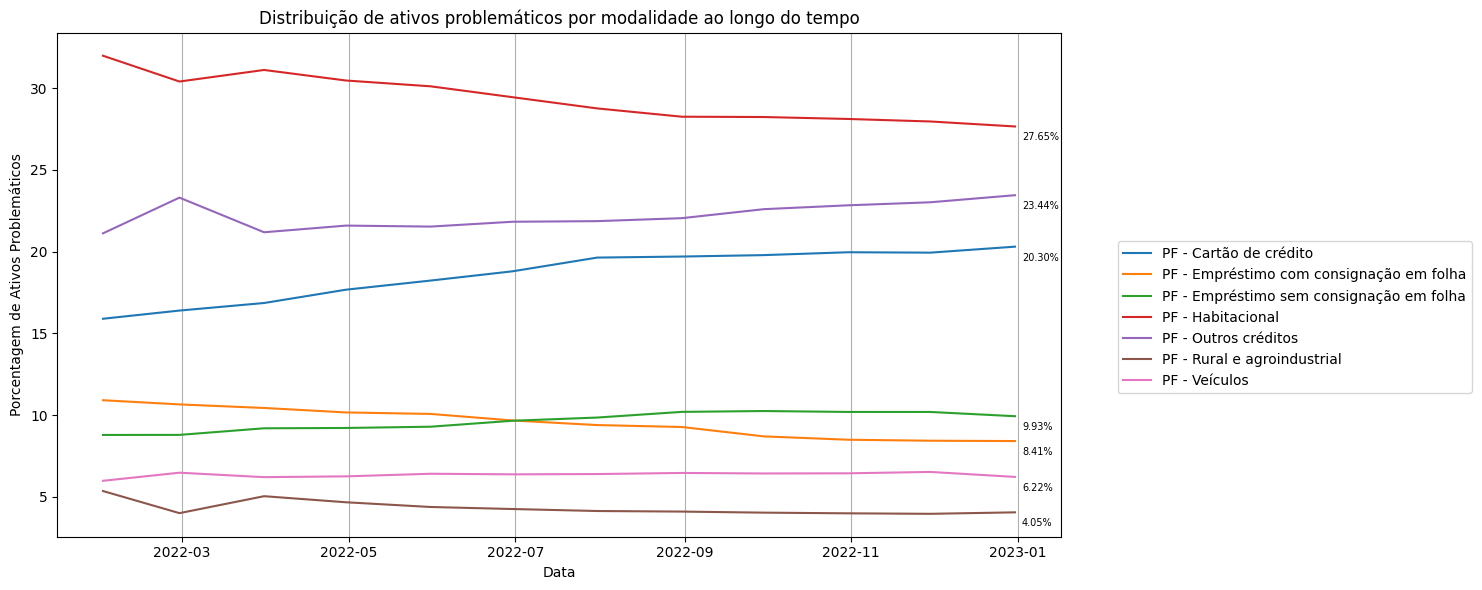

In [53]:
# Agrupando os dados por mês e por modalidade.
df_s1grouped = painel_operacoes_de_credito_por_s1_e_pf.groupby(['data_base', 'modalidade']).sum()

# Criando uma tabela pivot para exibir os dados de ativos problemáticos por modalidade.
painel_operacoes_de_credito_por_s1_e_pf_pivot = pd.pivot_table(df_s1grouped, values='ativo_problematico', index=['data_base'], columns=['modalidade'])

# Calculando o total de ativos problemáticos por mês.
total_ativos_problematicos = painel_operacoes_de_credito_por_s1_e_pf_pivot.sum(axis=1)

# Calculando a porcentagem de ativos problemáticos para cada modalidade em cada mês.
painel_operacoes_de_credito_por_s1_e_pf_percent = painel_operacoes_de_credito_por_s1_e_pf_pivot.apply(lambda x: x/total_ativos_problematicos*100)

# Criando o gráfico de linhas.
fig, ax = plt.subplots(figsize=(15,6))

# Plotando os dados de ativos problemáticos para cada modalidade.
for modalidade in painel_operacoes_de_credito_por_s1_e_pf_pivot.columns:
    ax.plot(painel_operacoes_de_credito_por_s1_e_pf_percent.index, painel_operacoes_de_credito_por_s1_e_pf_percent[modalidade], label=modalidade)

    # Adicionando a porcentagem de ativos problemáticos na última observação de cada modalidade.
    last_observation = painel_operacoes_de_credito_por_s1_e_pf_percent[modalidade].dropna().index[-1]
    last_value = painel_operacoes_de_credito_por_s1_e_pf_percent[modalidade].dropna().iloc[-1]
    ax.annotate(f"{last_value:.2f}%", xy=(last_observation, last_value), fontsize=7,
                xytext=(5, -10), textcoords='offset points')

# Adicionando título, rótulos dos eixos e legenda ao gráfico.
ax.set_title('Distribuição de ativos problemáticos por modalidade ao longo do tempo')
ax.set_xlabel('Data')
ax.set_ylabel('Porcentagem de Ativos Problemáticos')
ax.legend(painel_operacoes_de_credito_por_s1_e_pf_pivot, bbox_to_anchor = (1.05, 0.6))

# Exibindo gráfico.
plt.grid(axis='x')

# Ajustar o tamanho do gráfico.
plt.tight_layout()

# Exibir o gráfico.
plt.show()

**Observações:** O crédito habitacional mantêm-se a modalidade com maior peso nos ativos problemáticos durante todo o período analisado, seguido pela agregação "Outros Créditos" e pelo Cartão de Crédito. Isso indica que desdobramentos deste estudo podem focar no Crédito Habitacional ou Cartão de Crédito para estabelecer modelos de previsão de risco de default.

### **Conclusão final** 
 As análises do setor bancário e de crédito costumam ser dificuldadas pela sensibilidade dos dados relevantes, levando muitas vezes à realização de modelos com amostras muito antigas, ou com variáveis desidentificadas.
 Optamos por analisar um dataset com dados reais das operações de crédito, criado pelo Banco Central do Brasil, por considerarmos valiosa a oportunidade de acesso a dados atualizados e amplamente documentados. 
  Em razão do imenso volumes de dados, direcionamos nossa análise ao tipo de cliente Pessoa Fisica (PF) e ao Segmento (SR) do tipo S1, que correponde ao segmento bancário de maior porte. O que foi suficiente para contruirmos nossa análise e confirmarmos nossas hipóteses iniciais.
  Em resumo, pudemos concluir que, considerando os dados do Banco Central, em 2022 a maior parcela dos ativos problemáticos foi composta por indivíduos com renda entre 1 e 2 salários mínimos com maior incidência na modalidade de crédito habitacional. Possivelmente, um efeito da pandemia e da alta da inflação do período que impactou o mercado imobilíario.
  Por fim, notamos um padrão regional e sazonal nas ocorrências dos ativos prolemáticos com seus indíces mais elevados no último trimestre do ano, sobretudo em Dezembro. Além disso, os ativos problemáticos estão localizados centralmente na Região Sudeste, principalmente entre os Estados de São Paulo, Rio de Janeiro e Minas Gerais, considerados alguns dos mais ricos da federação e também os maiores e indice demográfico.
  A análise realizada servirá como base para o desenvolvimento futuro de estudos na área, relacionados À previsão de risco de default em créditos à pessoa física no Brasil.

